# Multi-Modal Data Fusion - Exercise 2: Common representational formats


## Learning goals

After this exercise, you should
  
- be able to implement PCA on your own and use it from sklearn
- be able to implement LDA algorithm
- be able to implement bootstrapping algorithm
- know how to apply (Gradient) Boosting algorithm for classification problem



## Relevant lecture

Lecture 3.

## Relevant chapters in course book

Chapter 4.

## Additional material

- Scikit-learn https://scikit-learn.org/stable/
- Pandas https://pandas.pydata.org/docs/
- numpy https://numpy.org/doc/stable/

In [1]:
import numpy as np
from random import shuffle
import scipy.linalg as la
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics

# Assignments

<a id='Task1.1'></a>
<div class=" alert alert-warning">
    <b>Problem 1: Bootstrapping</b>

<p>Implement bootstrapping (see Lecture 3) to the function stub below. You may assume that D is the dataset given as Python list. M is the number of resamples drawn. The function should return MxN matrix where each row contains one bootstrapped sample. 
    
Use of numpy is recommended, especially size() and tile(). Try to use as few for loops as possible.</p>

</div>

In [2]:
def bootstrap(D,M):
    # Implement here
    samples = np.tile(D, (M, 1))
    for row_no in range(M):
        shuffle(D)
        samples[row_no] = D
    
    return samples

Sample usage of the bootstrapping algorithm.

In [3]:
D = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
print(bootstrap(D,3))

[[ 3  1  4  2  5  6 10  7  9  8]
 [ 2  9  7  6 10  8  1  4  3  5]
 [ 6  9  5  7  8  3 10  1  2  4]]


<a id='Task1.1'></a>
<div class=" alert alert-warning">
    <b>Problem 2: PCA</b>

<p>Implement PCA algorithm as described in Lecture 3. Use data from pca_data.csv. Compute $\mu$ and $\Sigma$ as explained in lecture slides. Find eigenvalues and eigenvectors of $\Sigma$. Pick the first principal component which corresponds to largest eigenvalue. Plot the data and first principal component in same figure. The line depicting the first principal component should start from mean $\mu$ and end in $\mu\pm u_1$, where $u_1$ is the first principal component.</p>

</div>

[[0.81472369 1.08541859]
 [0.90579194 1.28768719]
 [0.12698682 0.26202135]
 [0.91337586 1.28071823]
 [0.63235925 0.91546511]
 [0.0975404  0.20383426]
 [0.27849822 0.40903223]
 [0.54688152 0.79173554]
 [0.95750684 1.28856361]
 [0.96488854 1.35185149]
 [0.15761308 0.21247302]
 [0.97059278 1.31651367]
 [0.95716695 1.27561075]
 [0.48537565 0.65422911]
 [0.80028047 1.14501449]
 [0.14188634 0.25788952]
 [0.42176128 0.59175425]
 [0.91573553 1.31100026]
 [0.79220733 1.05539323]
 [0.95949243 1.31795598]]
Eigenvalues and eigenvectors
[0.00039878+0.j 0.29857288+0.j]
[[-0.79766233 -0.60310431]
 [ 0.60310431 -0.79766233]]


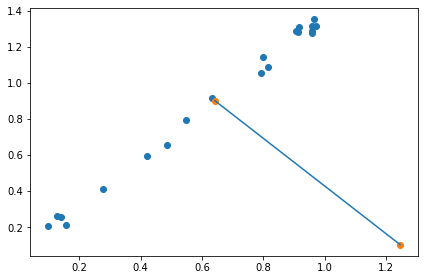

In [4]:
pca_data = np.genfromtxt('pca_data.csv', delimiter = ',')
print(pca_data)
mean = np.mean(pca_data, axis = 0)
# print(mean)
cov = np.cov(np.transpose(pca_data))
# print(cov)

cov_eigvals, cov_eigvecs = la.eig(cov) # compute eigenvalues and eigenvectors
print("Eigenvalues and eigenvectors")
print(cov_eigvals)
print(cov_eigvecs)
pca1 = cov_eigvecs[list(cov_eigvals).index(max(cov_eigvals))] # get the principal component, i.e. 
                                                              # the eigenvector corresponding to the biggest eigenvalue
fig, ax = plt.subplots()
ax.scatter(pca_data[:,0], pca_data[:,1])

ax.scatter([mean[0], mean[0] + pca1[0]], [mean[1], mean[1] + pca1[1]])
ax.plot([mean[0], mean[0] + pca1[0]], [mean[1], mean[1] + pca1[1]]) #line from mean to mean + pca1
fig.tight_layout()

In [68]:
#same as above, different implementation
pca_sub_mean = np.array(pca_data - mean)
sigma = np.sum([np.matmul(np.transpose([pca_sub_mean_value]), [pca_sub_mean_value]) for pca_sub_mean_value in pca_sub_mean], axis=0)/len(pca_data)
# print(sigma)
sigma_eigvals, sigma_eigvecs = la.eig(sigma)
print("Eigenvalues and eigenvectors")
print(sigma_eigvals)
print(sigma_eigvecs)

Eigenvalues and eigenvectors
[0.00037884+0.j 0.28364423+0.j]
[[-0.79766233 -0.60310431]
 [ 0.60310431 -0.79766233]]


<a id='Task1.1'></a>
<div class=" alert alert-warning">
    <b>Problem 3: PCA using sklearn</b>

<p>Consult documentation of sklearn on how to perform PCA using sklearn. Perform PCA using sklearn on same dataset as in Problem 2. Pick the model and train it (fit it) using same data as above. Do you get the same results? If not, what might be a reason for it?</p>

</div>

Eigenvectors
[[-0.60310431 -0.79766233]
 [-0.79766233  0.60310431]]


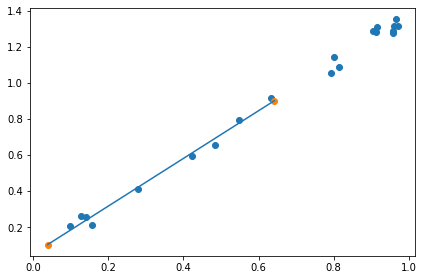

In [5]:
pca = PCA(whiten = "True")
pca.fit(pca_data)
trans_pca = pca.transform(pca_data)
# print(trans_pca)
# print(trans_pca[:,0])
print("Eigenvectors")
print(pca.components_)
fig, ax = plt.subplots()
ax.scatter(pca_data[:,0], pca_data[:,1])

ax.scatter([mean[0], mean[0] + pca.components_[0,0]], [mean[1], mean[1] + pca.components_[0,1]])
ax.plot([mean[0], mean[0] + pca.components_[0,0]], [mean[1], mean[1] + pca.components_[0,1]])
fig.tight_layout()

I do not get the same result. My implementations eigenvectors are mirrored on the vertical axis. My implementation seems to give the second principal component.

<a id='Task1.1'></a>
<div class=" alert alert-warning">
    <b>Problem 4: LDA</b>

<p>Implement LDA algorithm as described in Lecture 3. Use data from lda_data.csv. The data consists of x coordinate, y coordinate and class label (0 or 1). Compute the quantities appearing in lecture slides. The LDA projection operator $U$ consists of single column which is the eigenvector of $H$ corresponding to the largest eigenvalue. Plot the data and the LDA subspace (line) in same figure. The line depicting the LDA subspace should start from mean $\mu_G$ and end in $\mu_G\pm u$, where $u$ is the direction of LDA subspace.</p>

</div>

Eigenvalues and eigenvectors:
[13.77424267+0.j  0.14851224+0.j]
[[ 9.99915632e-01 -1.32830727e-04]
 [ 1.29896045e-02  9.99999991e-01]]


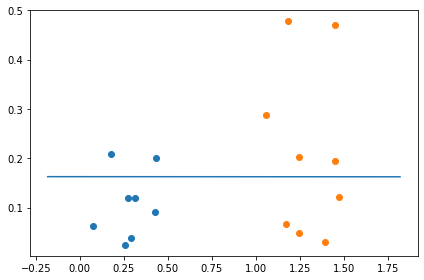

In [134]:
lda_data = np.genfromtxt('lda_data.csv', delimiter = ',')
# print(lda_data)
# print(classes)
class_ind_0 = np.where(lda_data[:,2] == 0)[0]
class_ind_1 = np.where(lda_data[:,2] == 1)[0]
n_k_0 = len(class_ind_0)
n_k_1 = len(class_ind_1)
mu_0 = np.mean(lda_data[class_ind_0][:, [0,1]], axis=0)
mu_1 = np.mean(lda_data[class_ind_1][:, [0,1]], axis=0)
# print(mu_0)
# print(np.mean(mu_0,axis = 0))
n = lda_data.shape[0]
# print(n)
mu_g = (np.multiply(n_k_0,  mu_0) + np.multiply(n_k_1, mu_1))/n
# print(mu_g)
# print(np.cov(np.transpose(lda_data[class_ind_1][:, [0,1]])))
# print(np.cov(np.transpose(lda_data[class_ind_0][:, [0,1]])))
sigma_0 = np.cov(np.transpose(lda_data[class_ind_0][:, [0,1]]))
sigma_1 = np.cov(np.transpose(lda_data[class_ind_1][:, [0,1]]))
# print(sigma_0)
# print(sigma_1)
sigma_w = (np.multiply(n_k_0, sigma_0) + np.multiply(n_k_1, sigma_1))/n
# print(sigma_w)
sigma_b = (np.multiply(np.multiply(n_k_0, (mu_0 - mu_g)), np.transpose(mu_0 - mu_g)) + np.multiply(np.multiply(n_k_1, (mu_1 - mu_g)), np.transpose(mu_1 - mu_g)))/n
# print(sigma_b)
h = np.multiply(np.linalg.inv(sigma_w), sigma_b)
# print(h)
h_eigval, h_eigvec = la.eig(h)
print("Eigenvalues and eigenvectors:")
print(h_eigval)
print(h_eigvec)
fig, ax = plt.subplots()
ax.scatter(lda_data[class_ind_0][:, 0], lda_data[class_ind_0][:, 1])
ax.scatter(lda_data[class_ind_1][:, 0], lda_data[class_ind_1][:, 1])
ax.plot([mu_g[0] - h_eigvec[0,0], mu_g[0] + h_eigvec[0,0]], [mu_g[1] - h_eigvec[0,1], mu_g[1]+h_eigvec[0,1]])
fig.tight_layout()

<a id='Task1.1'></a>
<div class=" alert alert-warning">
    <b>Problem 5: Boosting</b>

<p>Use the tab-separated(!) file wifi_localization.txt. The data allows to determine indoor room location from wifi signal strenghts. Last column of the file contains class labels of rooms while the first seven columns contains signal strengths of mobile phones. Split the dataset into training (70%), validation (15%) and testing sets (15%). Train GradientBoostingClassifier from sklearn using n_estimators between 1-40. Consult documentation of sklearn (or Google) on how to do this. Compute the validation score on validation set using score(). Plot scores against n. Pick the value for n giving highest score and train the model using training data. For that n,  plot confusion matrix for testing set.</p>

</div>

In [148]:
wifi_data = np.genfromtxt('wifi_localization.txt', delimiter = '\t')
# print(wifi_data)
wifi_labels = wifi_data[:,-1]
# print(wifi_data_labels)
wifi_data = np.delete(wifi_data, -1, 1)
# print(wifi_data)
wifi_train, wifi_val_test, wifi_labels_train, wifi_labels_val_test = train_test_split(wifi_data, wifi_labels, train_size=0.70)
wifi_validation, wifi_test, wifi_labels_validation, wifi_labels_test = train_test_split(wifi_val_test, wifi_labels_val_test, train_size=0.50)
# print(wifi_test)
# print(wifi_labels_test)
# print(len(wifi_validation))
# print(len(wifi_train))
bgc_list = [GradientBoostingClassifier(n_estimators = n+1) for n in range(40)]
bgc_list_trained = [bgc.fit(wifi_train, wifi_labels_train) for bgc in bgc_list]

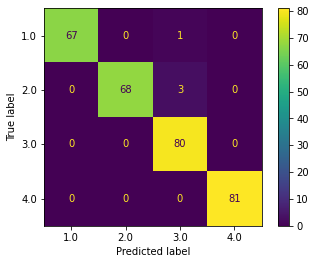

In [172]:
bgc_validated = [bgc.score(wifi_validation, wifi_labels_validation) for bgc in bgc_list_trained]
best_n_bgc = bgc_list[bgc_validated.index(max(bgc_validated))]
metrics.plot_confusion_matrix(best_n_bgc, wifi_test, wifi_labels_test)
plt.show()